In [ ]:
%pip install pandas 

In [ ]:
%pip install matplotlib

In [ ]:
%pip install seaborn

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\Aniruddha\Desktop\Training\EndtoEnd\Tech_Classes\hotel_booking\hotel_bookings 2.csv")

In [3]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015


## EDA and Data Cleaning

In [4]:
df.shape

(119390, 32)

In [5]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
#Converting reservation_status_date to datetime instead of object
try:
    df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'],
                                                   format='mixed',dayfirst=True)
except Exception as e:
    print(f"{e}")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

In [9]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,...,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,...,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363,2016-07-30 00:24:47.883407104
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000,2016-02-01 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000,2016-08-07 00:00:00
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000,2017-02-08 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,...,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,...,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798,NaN


In [10]:
df.describe(include='object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


In [11]:
df.describe(include='object').columns

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status'],
      dtype='object')

In [12]:
#To showcase unique data in 'object' columns

for col in df.describe(include='object').columns:
    print(col)
    print(df[col].unique())
    print("----"*50)


hotel
['Resort Hotel' 'City Hotel']
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'S

In [13]:
#Null/Missing values in df
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [14]:
#Columns not needed in analysis
df.drop(['agent','company'],axis= 1, inplace=True)

In [15]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [16]:
#Dealing with missing values
df.dropna(inplace=True)

In [17]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [18]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683,2016-07-30 07:37:53.336809984
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,2016-02-02 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,2016-08-08 00:00:00
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-09 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678,NaN


In [21]:
#Removing outlier of 5400 in adr column
df = df[df['adr']<5000]

In [22]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897
mean,0.371347,104.312018,2016.157657,27.166674,15.800802,0.928905,2.502157,1.858390,0.104208,0.007948,0.032011,0.087143,0.131635,0.221175,2.330774,101.958683,0.061885,0.571688,2016-07-30 07:39:51.289939968
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,2016-02-02 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,2016-08-08 00:00:00
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-09 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,510.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.483167,106.903570,0.707462,13.589966,8.780321,0.996217,1.900171,0.578578,0.399174,0.097381,0.176030,0.845872,1.484678,0.652784,17.630525,48.091199,0.244173,0.792680,NaN


## Data Analysis and Viz

is_canceled
0    0.628653
1    0.371347
Name: proportion, dtype: float64


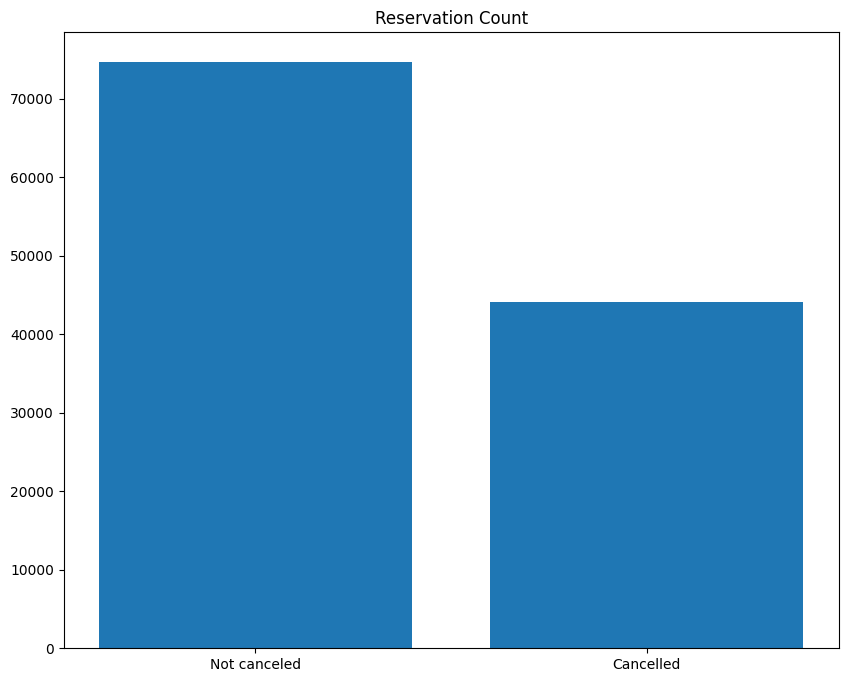

In [23]:
#Value counts is a function that returns category name and how many times kind of
#  is present in the column
canceled_percentage = df['is_canceled'].value_counts(normalize=True)
print(canceled_percentage)

plt.figure(figsize=(10,8))
plt.title("Reservation Count")
plt.bar(['Not canceled','Cancelled'],df['is_canceled'].value_counts(),width=0.8)
plt.show()
#62.8 % dont get canceled

Text(0, 0.5, 'No of reservations')

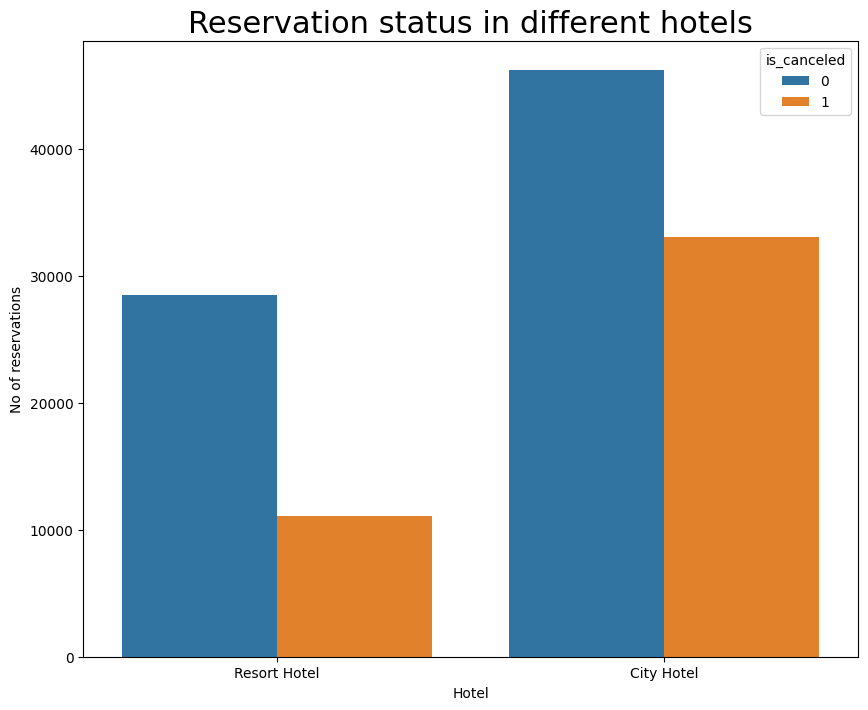

In [24]:
#Cancellation status in each type of hotels

plt.figure(figsize=(10,8))
ax1 = sns.countplot(data=df, hue='is_canceled',x='hotel')
plt.title("Reservation status in different hotels", fontsize = 22)
plt.xlabel("Hotel")
plt.ylabel("No of reservations")

In [25]:
#Filtering out cancellations in each of them types

City_Hotel = df[df['hotel'] == 'City Hotel']

In [26]:
City_Hotel['is_canceled'].value_counts(normalize=True)

is_canceled
0    0.582918
1    0.417082
Name: proportion, dtype: float64

In [27]:
City_Hotel

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
40060,City Hotel,0,6,2015,July,27,1,0,2,1,...,A,0,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-03
40061,City Hotel,1,88,2015,July,27,1,0,4,2,...,A,0,No Deposit,0,Transient,76.50,0,1,Canceled,2015-07-01
40062,City Hotel,1,65,2015,July,27,1,0,4,1,...,A,0,No Deposit,0,Transient,68.00,0,1,Canceled,2015-04-30
40063,City Hotel,1,92,2015,July,27,1,2,4,2,...,A,0,No Deposit,0,Transient,76.50,0,2,Canceled,2015-06-23
40064,City Hotel,1,100,2015,July,27,2,0,2,2,...,A,0,No Deposit,0,Transient,76.50,0,1,Canceled,2015-04-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,A,0,No Deposit,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [28]:
Resort_Hotel = df[df['hotel'] == 'Resort Hotel']

In [31]:
Resort_Hotel['is_canceled'].value_counts(normalize=True)

is_canceled
0    0.72025
1    0.27975
Name: proportion, dtype: float64

In [32]:
Resort_Hotel

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40055,Resort Hotel,0,212,2017,August,35,31,2,8,2,...,A,1,No Deposit,0,Transient,89.75,0,0,Check-Out,2017-09-10
40056,Resort Hotel,0,169,2017,August,35,30,2,9,2,...,E,0,No Deposit,0,Transient-Party,202.27,0,1,Check-Out,2017-09-10
40057,Resort Hotel,0,204,2017,August,35,29,4,10,2,...,E,0,No Deposit,0,Transient,153.57,0,3,Check-Out,2017-09-12
40058,Resort Hotel,0,211,2017,August,35,31,4,10,2,...,D,0,No Deposit,0,Contract,112.80,0,1,Check-Out,2017-09-14


In [33]:
#Does price play a role in these cancellations

r_hotel = Resort_Hotel.groupby(by='reservation_status_date')[['adr']].mean()
r_hotel

,adr
reservation_status_date,
2014-11-18,0.000000
2015-01-01,61.966667
2015-01-02,9.633750
2015-01-18,0.000000
2015-01-21,37.301209
...,...
2017-09-08,101.012500
2017-09-09,147.778333
2017-09-10,145.272500


In [34]:
c_hotel = City_Hotel.groupby(by='reservation_status_date')[['adr']].mean()
c_hotel

,adr
reservation_status_date,
2014-10-17,62.800000
2015-01-01,62.063158
2015-01-20,76.500000
2015-01-30,61.400000
2015-02-17,76.500000
...,...
2017-09-03,137.172600
2017-09-04,116.925385
2017-09-05,154.000000


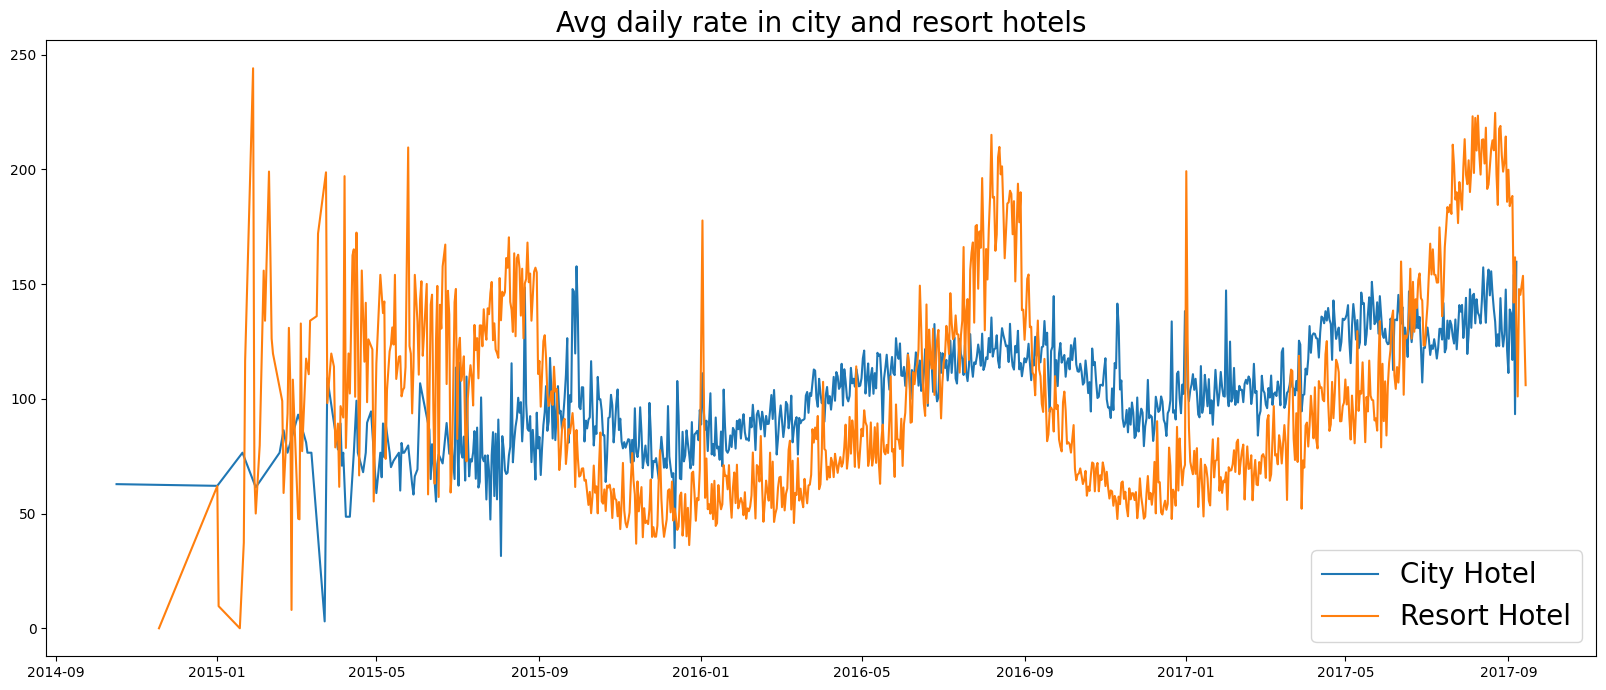

In [35]:
#Cancellations by dates in both types
try:
    plt.figure(figsize=(20,8))
    plt.plot(c_hotel.index, c_hotel['adr'],label = "City Hotel")
    plt.plot(r_hotel.index,r_hotel['adr'],label = "Resort Hotel")
    plt.legend(fontsize = 20)
    plt.title("Avg daily rate in city and resort hotels",fontsize = 20)
    plt.show()
except Exception as e:
    print(f"{e}")

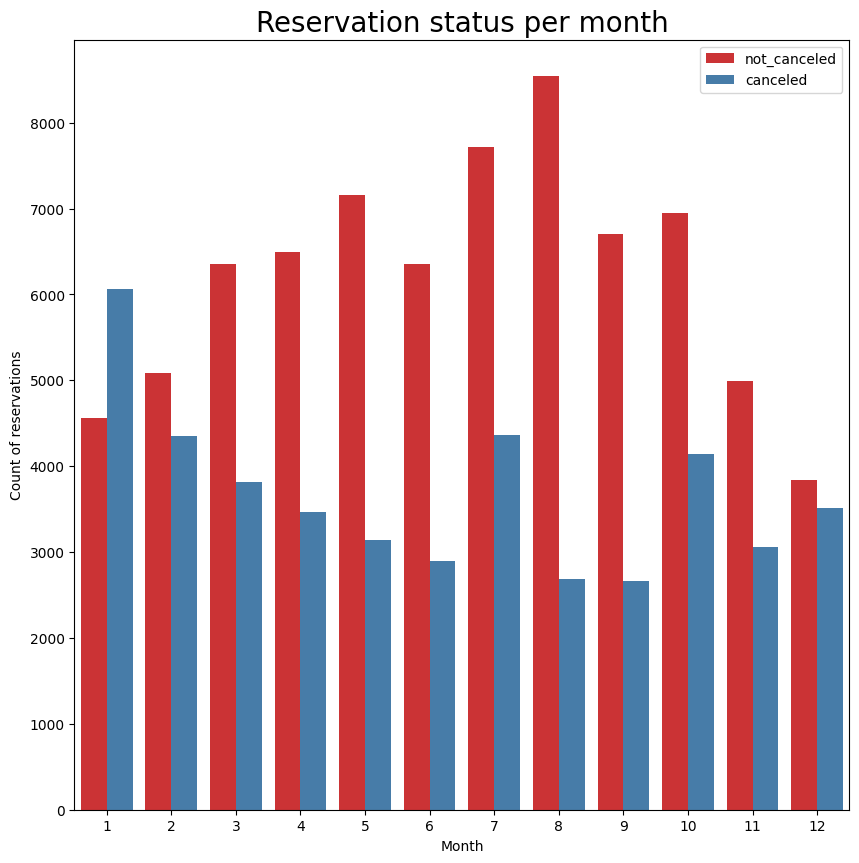

In [36]:
#Month wise cancellations

df['month'] = df['reservation_status_date'].dt.month
plt.figure(figsize=(10,10))
plt.title("Reservation status per month",fontsize = 20)

ax1 = sns.countplot(data=df, x='month',hue='is_canceled',palette='Set1')
legend_labels,_ = ax1.get_legend_handles_labels()
ax1.legend(bbox_to_anchor=(1,1))

plt.xlabel("Month")
plt.ylabel("Count of reservations")
plt.legend(['not_canceled','canceled'])
plt.show()

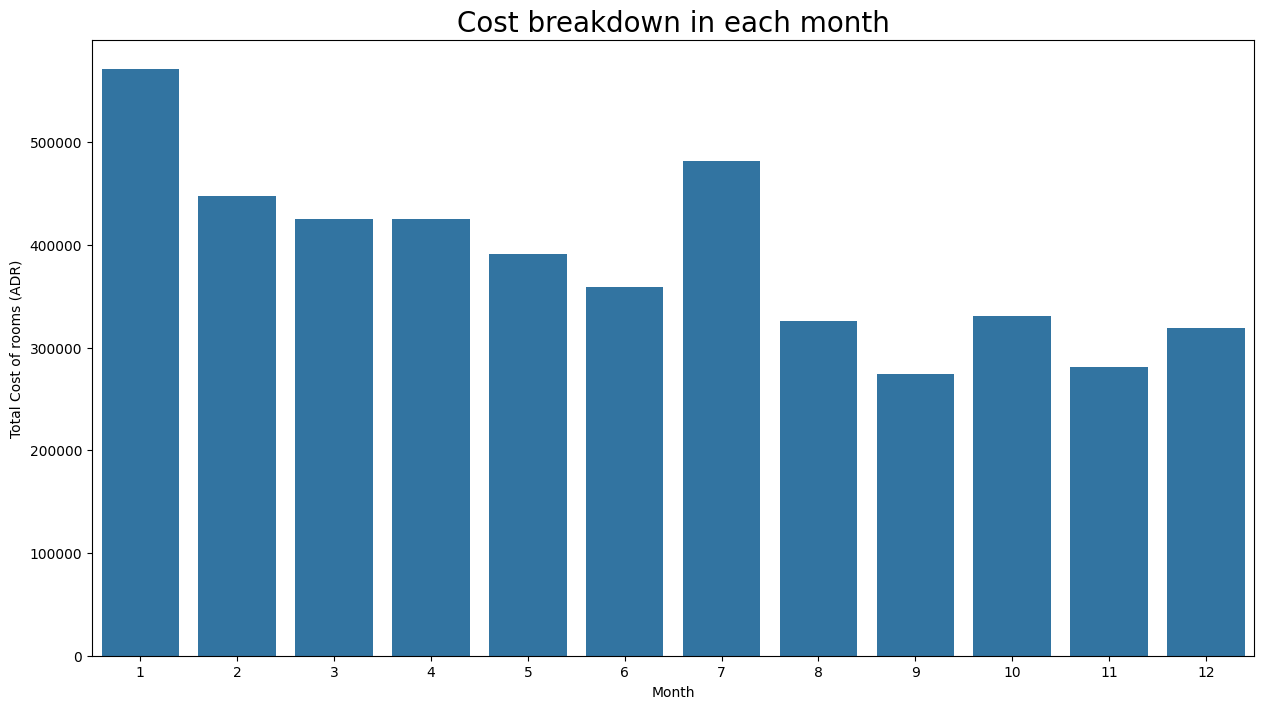

In [37]:
#were these many cancellations based on prices during months?

plt.figure(figsize=(15,8))
plt.title("Cost breakdown in each month",fontsize = 20)
sns.barplot(x='month',y='adr',data=df[df['is_canceled']==1].groupby('month')[['adr']].sum().reset_index())
plt.xlabel("Month")
plt.ylabel("Total Cost of rooms (ADR)")
plt.show()

country
PRT    27514
GBR     2453
ESP     2177
FRA     1934
ITA     1333
DEU     1218
IRL      832
BRA      830
USA      501
BEL      474
Name: count, dtype: int64


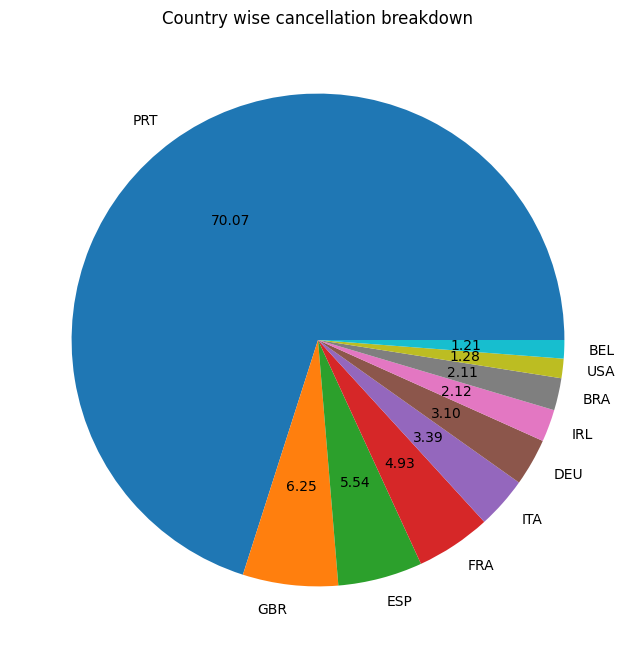

In [38]:
#Cancellations in country

df_canceled = df[df['is_canceled']==1]
top_10_country = df_canceled['country'].value_counts()[:10]

plt.figure(figsize=(8,8))
plt.title("Country wise cancellation breakdown")
print(top_10_country)
plt.pie(top_10_country,autopct='%.2f',labels=top_10_country.index)
plt.show()

In [39]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'month'],
      dtype='object')

In [40]:
#Testing hypothesis whether most businesses were coming from Offline agents
df['market_segment'].value_counts(normalize=True)

market_segment
Online TA        0.474377
Offline TA/TO    0.203193
Groups           0.166581
Direct           0.104696
Corporate        0.042987
Complementary    0.006173
Aviation         0.001993
Name: proportion, dtype: float64

In [41]:
df['market_segment'].value_counts()

market_segment
Online TA        56402
Offline TA/TO    24159
Groups           19806
Direct           12448
Corporate         5111
Complementary      734
Aviation           237
Name: count, dtype: int64

In [42]:
df_canceled['market_segment'].value_counts(normalize=True)

market_segment
Online TA        0.469696
Groups           0.273985
Offline TA/TO    0.187466
Direct           0.043486
Corporate        0.022151
Complementary    0.002038
Aviation         0.001178
Name: proportion, dtype: float64

In [43]:
df_not_canceled = df[df['is_canceled'] == 0]
df_canceled
df_not_canceled

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,month
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01,7
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01,7
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02,7
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02,7
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,0,Transient,98.00,0,1,Check-Out,2015-07-03,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,0,No Deposit,0,Transient,96.14,0,0,Check-Out,2017-09-06,9
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,0,No Deposit,0,Transient,225.43,0,2,Check-Out,2017-09-07,9
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,0,No Deposit,0,Transient,157.71,0,4,Check-Out,2017-09-07,9
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,0,No Deposit,0,Transient,104.40,0,0,Check-Out,2017-09-07,9


In [44]:
#Plotting the cancelled and non cancelled booking data

canceled_adr = df_canceled.groupby('reservation_status_date')[['adr']].mean()
canceled_adr.reset_index(inplace=True)
canceled_adr.sort_values(by='reservation_status_date',inplace=True)

not_canceled_adr = df_not_canceled.groupby('reservation_status_date')[['adr']].mean()
not_canceled_adr.reset_index(inplace=True)
not_canceled_adr.sort_values('reservation_status_date',inplace=True)

In [45]:
canceled_adr.head()

,reservation_status_date,adr
0,2014-10-17,62.800000
1,2014-11-18,0.000000
2,2015-01-01,62.062779
3,2015-01-02,9.633750
4,2015-01-18,0.000000


In [46]:
not_canceled_adr

,reservation_status_date,adr
0,2015-07-01,31.650000
1,2015-07-02,95.924000
2,2015-07-03,97.645205
3,2015-07-04,110.480000
4,2015-07-05,100.308485
...,...,...
800,2017-09-08,101.012500
801,2017-09-09,147.778333
802,2017-09-10,145.272500
803,2017-09-12,153.570000


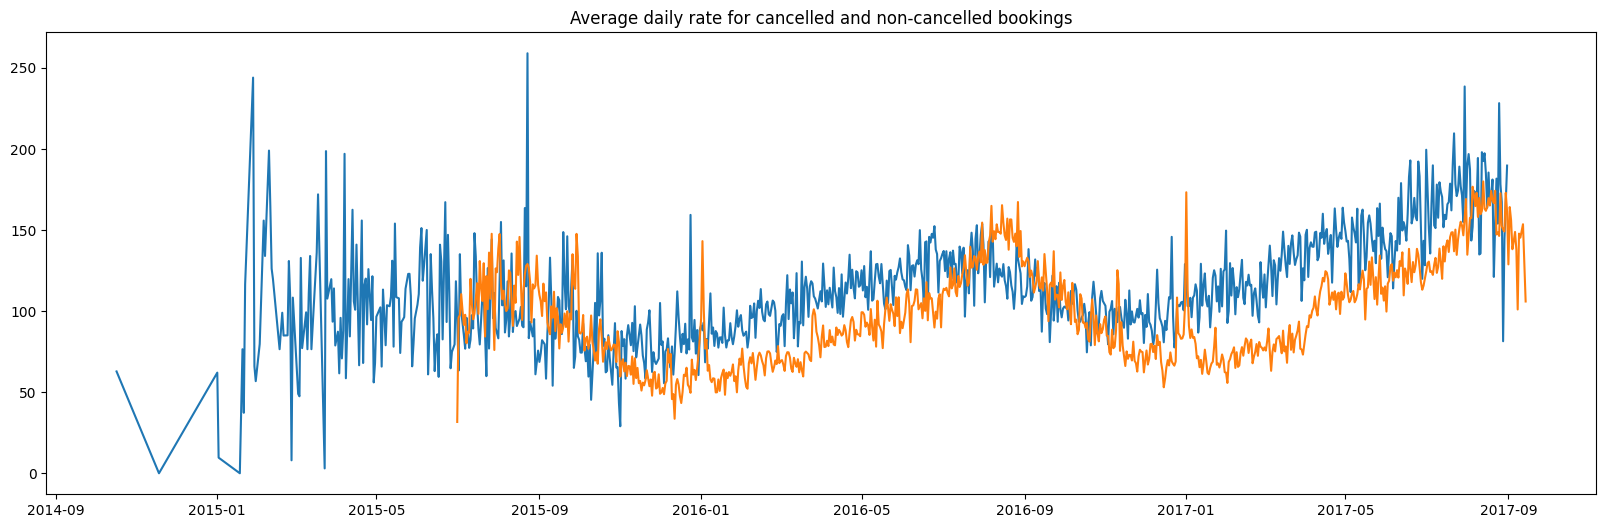

In [47]:
plt.figure(figsize=(20,6))
plt.title("Average daily rate for cancelled and non-cancelled bookings")

plt.plot(canceled_adr['reservation_status_date'],canceled_adr['adr'],label = "Cancelled")
plt.plot(not_canceled_adr['reservation_status_date'],not_canceled_adr['adr'],label = "Not Cancelled")

plt.show()

In [48]:
#Filtering out inconsitencies in time frame as there
# is lack of data for correct comparison of both
not_canceled_adr = not_canceled_adr[(not_canceled_adr['reservation_status_date']>'2016') & (not_canceled_adr['reservation_status_date']<'2017-09')]
canceled_adr = canceled_adr[(canceled_adr['reservation_status_date']>'2016') & (canceled_adr['reservation_status_date']<'2017-09')]

In [49]:
not_canceled_adr

,reservation_status_date,adr
185,2016-01-02,143.154565
186,2016-01-03,100.776163
187,2016-01-04,76.913125
188,2016-01-05,82.525818
189,2016-01-06,63.240952
...,...,...
788,2017-08-27,152.494744
789,2017-08-28,150.247197
790,2017-08-29,149.113494
791,2017-08-30,172.943662


In [50]:
canceled_adr

,reservation_status_date,adr
295,2016-01-02,88.147143
296,2016-01-03,93.053810
297,2016-01-04,68.428750
298,2016-01-05,82.809895
299,2016-01-06,76.845820
...,...,...
897,2017-08-26,178.200000
898,2017-08-27,167.300000
899,2017-08-28,81.416667
900,2017-08-29,144.253333


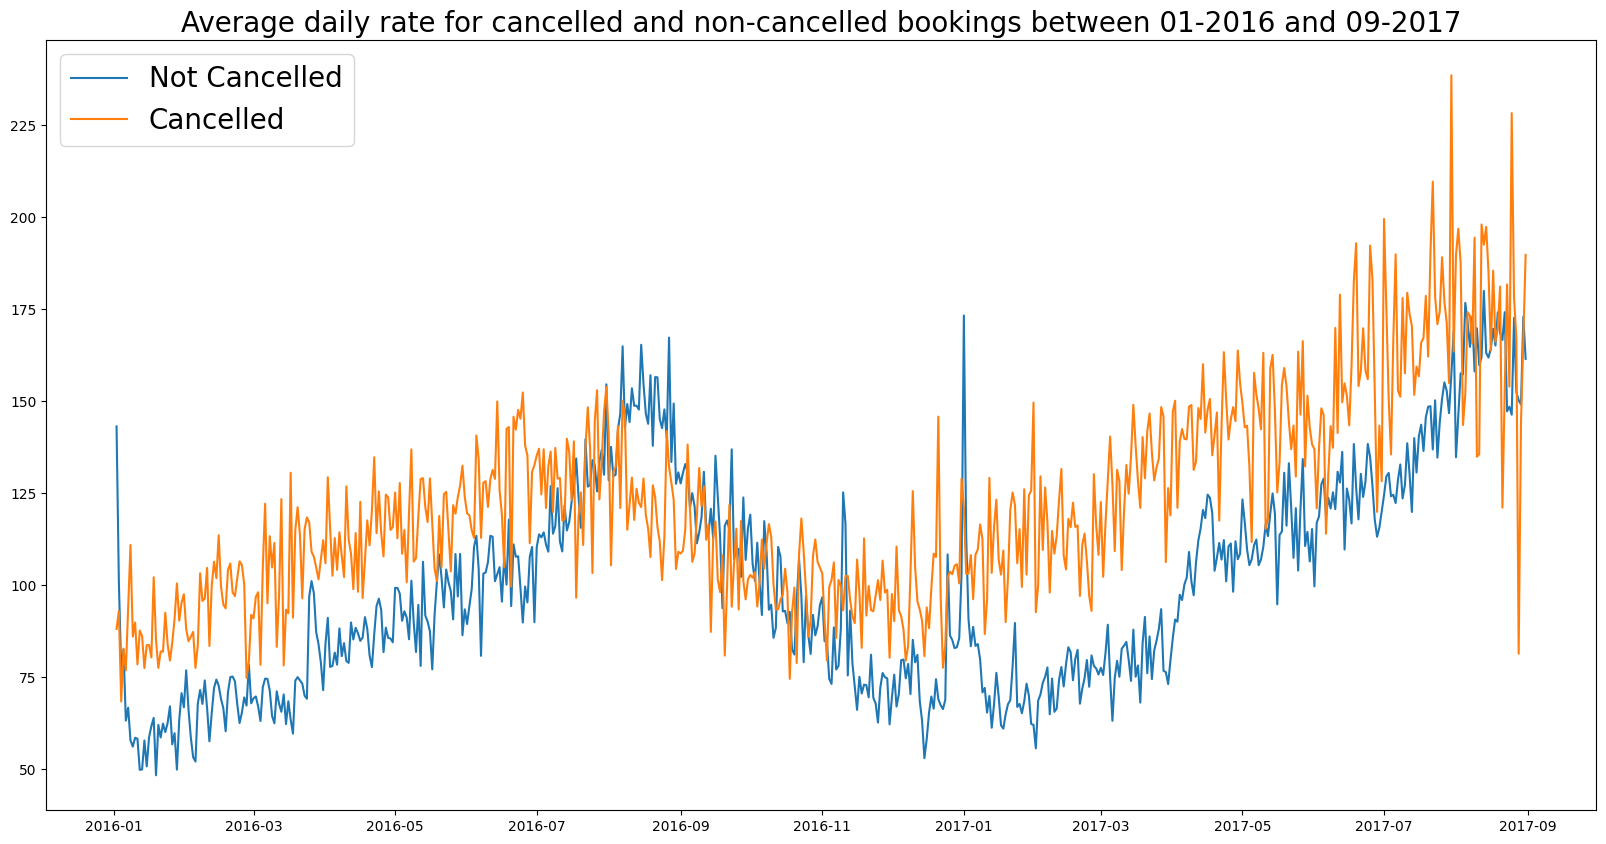

In [51]:
plt.figure(figsize=(20,10))
plt.title("Average daily rate for cancelled and non-cancelled " \
"bookings between 01-2016 and 09-2017",fontsize = 20)

plt.plot(not_canceled_adr['reservation_status_date'],not_canceled_adr['adr'],label = "Not Cancelled")
plt.plot(canceled_adr['reservation_status_date'],canceled_adr['adr'],label = "Cancelled")
plt.legend(fontsize = 20)
plt.show()

In [62]:
df_waitlist_nocancel = df[(df['days_in_waiting_list']>0) & (df['is_canceled'] == 0)]

In [80]:
df_waitlist_nocancel['days_in_waiting_list'].mean()

np.float64(89.2486930545183)

In [68]:
df_waitlist_cancel = df[(df['days_in_waiting_list']>0) & (df['is_canceled'] == 1)]

In [81]:
df_waitlist_cancel['days_in_waiting_list'].mean()

np.float64(66.81559983043662)

In [85]:
df_waitlist_cancel.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'month'],
      dtype='object')

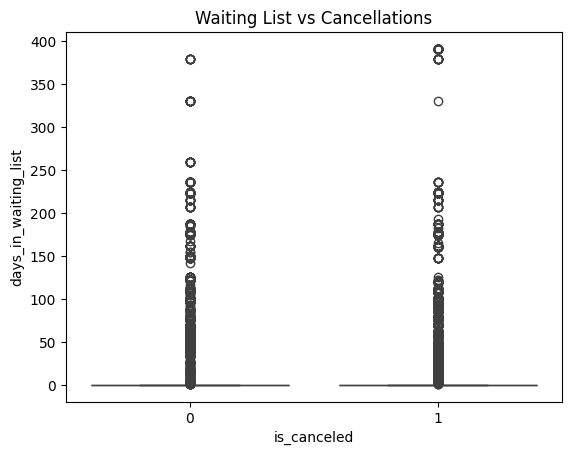

,count,mean,std,min,25%,50%,75%,max
is_canceled,,,,,,,,
0,74745.0,1.598823,14.825972,0.0,0.0,0.0,0.0,379.0
1,44152.0,3.569895,21.505800,0.0,0.0,0.0,0.0,391.0


In [97]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x="is_canceled", y="days_in_waiting_list", data=df)
plt.title("Waiting List vs Cancellations")
plt.show()

df.groupby("is_canceled")["days_in_waiting_list"].describe()


In [98]:
%pip install scipy

  Using cached scipy-1.16.1-cp313-cp313-win_amd64.whl.metadata (60 kB)
Using cached scipy-1.16.1-cp313-cp313-win_amd64.whl (38.5 MB)
Note: you may need to restart the kernel to use updated packages.


In [99]:
from scipy.stats import spearmanr

corr, p = spearmanr(df['days_in_waiting_list'], df['is_canceled'])
print("Spearman correlation:", corr, "p-value:", p)


Spearman correlation: 0.0980478300755052 p-value: 9.470158509459084e-252


In [100]:
df['wait_category'] = pd.cut(df['days_in_waiting_list'],
                             bins=[-1,0,30,100, df['days_in_waiting_list'].max()],
                             labels=["No wait","Short","Medium","Long"])

ct = pd.crosstab(df['wait_category'], df['is_canceled'])
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(ct)
print("Chi2:", chi2, "p-value:", p)


Chi2: 1261.432224521698 p-value: 3.43707254016225e-273


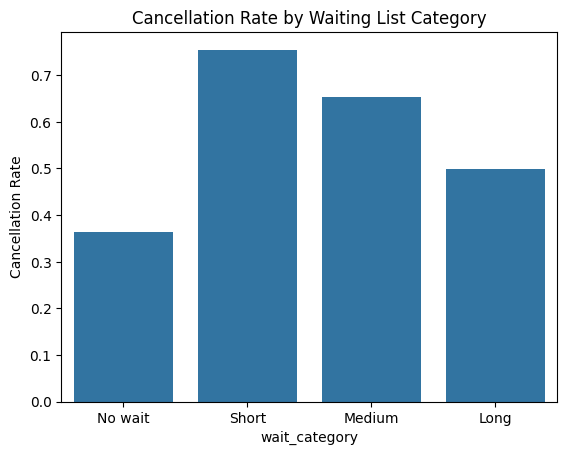

In [101]:
cancel_rate = df.groupby('wait_category')['is_canceled'].mean().reset_index()

sns.barplot(x="wait_category", y="is_canceled", data=cancel_rate)
plt.title("Cancellation Rate by Waiting List Category")
plt.ylabel("Cancellation Rate")
plt.show()
